In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
merged_df = pd.read_csv('D:\\projects\\jop\\testjup\\saasjet\\merged_df.csv', encoding='utf-8', delimiter=';')
merged_df['app_1st_release_date'] = pd.to_datetime(merged_df['app_1st_release_date'], errors='coerce')
merged_df.head()

,app_id,row_updated_at,app_name,app_link,app_name_key,app_key,product_type,app_1st_release_date,app_1st_release_by,app_1st_release_ver,...,Messaging,Language packs,Blueprints,Documentation,CRM,Dependency management,Charts & diagramming,Dashboard gadgets,Repository connectors,Continuous integration
0,292,2023-10-13 11:41:48,Jira Misc Workflow Extensions (JMWE),https://marketplace.atlassian.com/apps/292/jir...,jira-misc-workflow-extensions-jmwe,com.innovalog.jmwe.jira-misc-workflow-extensions,Jira,2008-11-23,David [old account],1.0,...,0,0,0,0,0,0,0,0,0,0
1,294,2023-10-13 11:41:48,Time Tracker - Jira Time Reports & Project Das...,https://marketplace.atlassian.com/apps/294/tim...,timesheet-reports-gadgets-by-tempo-jira-time-t...,jira-timesheet-plugin,Jira,2012-12-19,Andriy Zhdanov,2.3.9,...,0,0,0,0,0,0,1,1,0,0
2,4832,2023-10-13 11:41:48,Enterprise Mail Handler for Jira (JEMH),https://marketplace.atlassian.com/apps/4832/en...,enterprise-mail-handler-for-jira-jemh,com.javahollic.jira.jemh-ui,Jira,2021-05-14,Marketplace Hub [Atlassian],1.11.54-AC,...,1,0,0,0,0,0,0,0,0,0
3,4977,2023-10-13 11:41:48,Email This Issue,https://marketplace.atlassian.com/apps/4977/em...,email-this-issue,com.metainf.jira.plugin.emailissue,Jira,2009-06-04,Tibor Hegyi [META-INF],1.5,...,0,0,0,0,0,0,0,0,0,0
4,4984,2023-10-13 11:41:48,Git Integration for Jira (GitHub. GitLab. Azur...,https://marketplace.atlassian.com/apps/4984/gi...,git-integration-for-jira-github-gitlab-and-more,com.xiplink.jira.git.jira_git_plugin,Jira,2016-05-31,Marketplace Hub [Atlassian],1.1.0-AC,...,0,0,0,0,0,0,0,0,1,0


In [3]:
category_columns = ['Integrations', 'Source code', 'Custom fields', 'Time tracking', 'Tasks',
                    'Mobile', 'Reports', 'IT & helpdesk', 'Code review', 'Macros', 'Design tools',
                    'Build management', 'Deployments', 'IDE', 'Monitoring', 'Shared workflows',
                    'Admin tools', 'Security', 'Utilities', 'Repository hooks', 'Themes & styles',
                    'Testing & QA', 'Email', 'Document management', 'Workflow', 'Code quality',
                    'Project management', 'Messaging', 'Language packs', 'Blueprints', 'Documentation',
                    'CRM', 'Dependency management', 'Charts & diagramming', 'Dashboard gadgets',
                    'Repository connectors', 'Continuous integration']

host_columns = ['app_host_cloud', 'app_host_server', 'app_host_data_center', 'is_free_for_cloud', 'is_free_for_datacenter']

one_year_ago = pd.Timestamp.now() - pd.DateOffset(years=1)
df_last_year = merged_df[merged_df['app_1st_release_date'] >= one_year_ago]

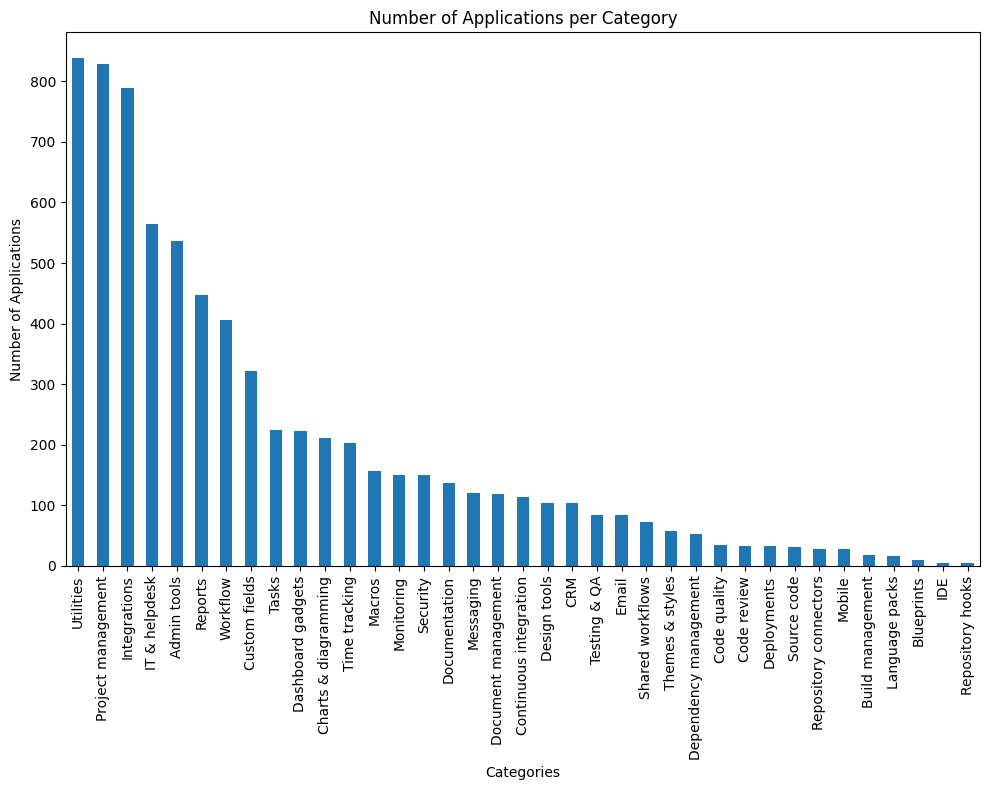

In [4]:
category_counts = merged_df[category_columns].sum()
category_counts_sorted = category_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
category_counts_sorted.plot(kind='bar')

plt.title('Number of Applications per Category')
plt.xlabel('Categories')
plt.ylabel('Number of Applications')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

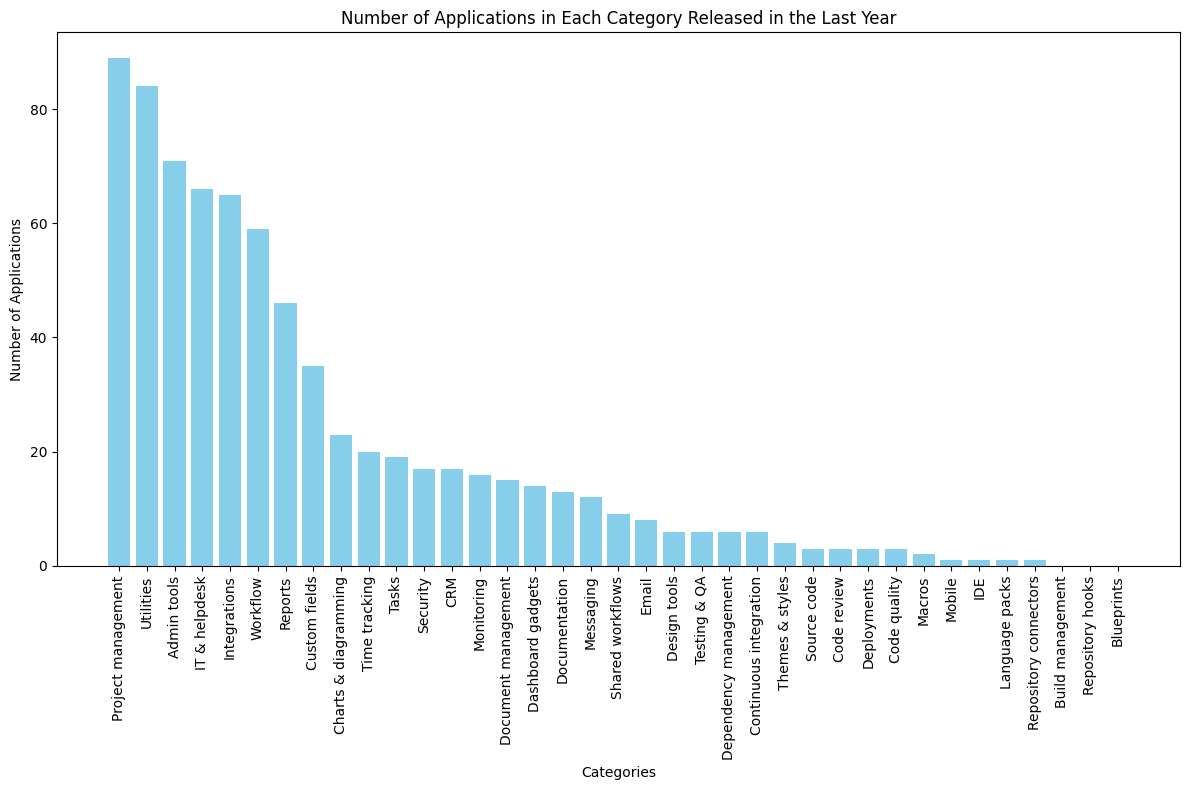

In [5]:
category_counts = {}
for category in category_columns:
    category_counts[category] = df_last_year[category].sum()

sorted_category_counts = dict(sorted(category_counts.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(12, 8))
plt.bar(sorted_category_counts.keys(), sorted_category_counts.values(), color='skyblue')
plt.title('Number of Applications in Each Category Released in the Last Year')
plt.xlabel('Categories')
plt.ylabel('Number of Applications')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

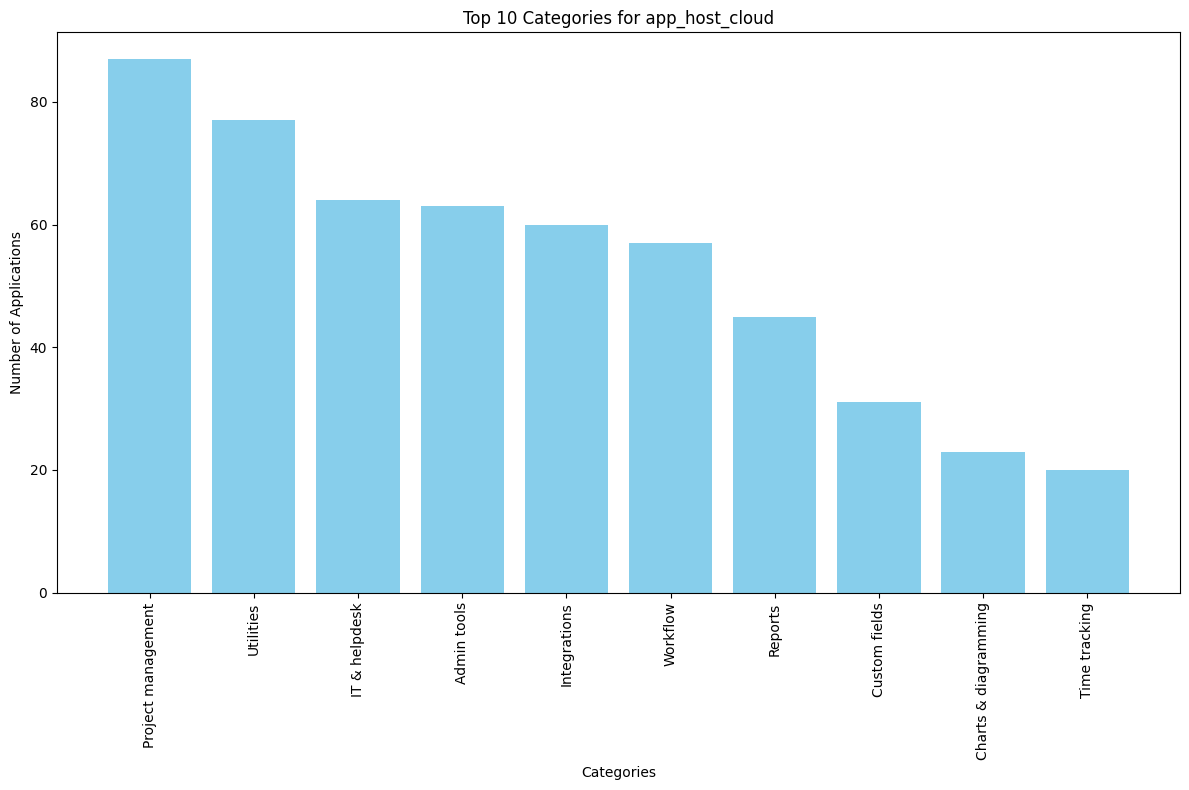

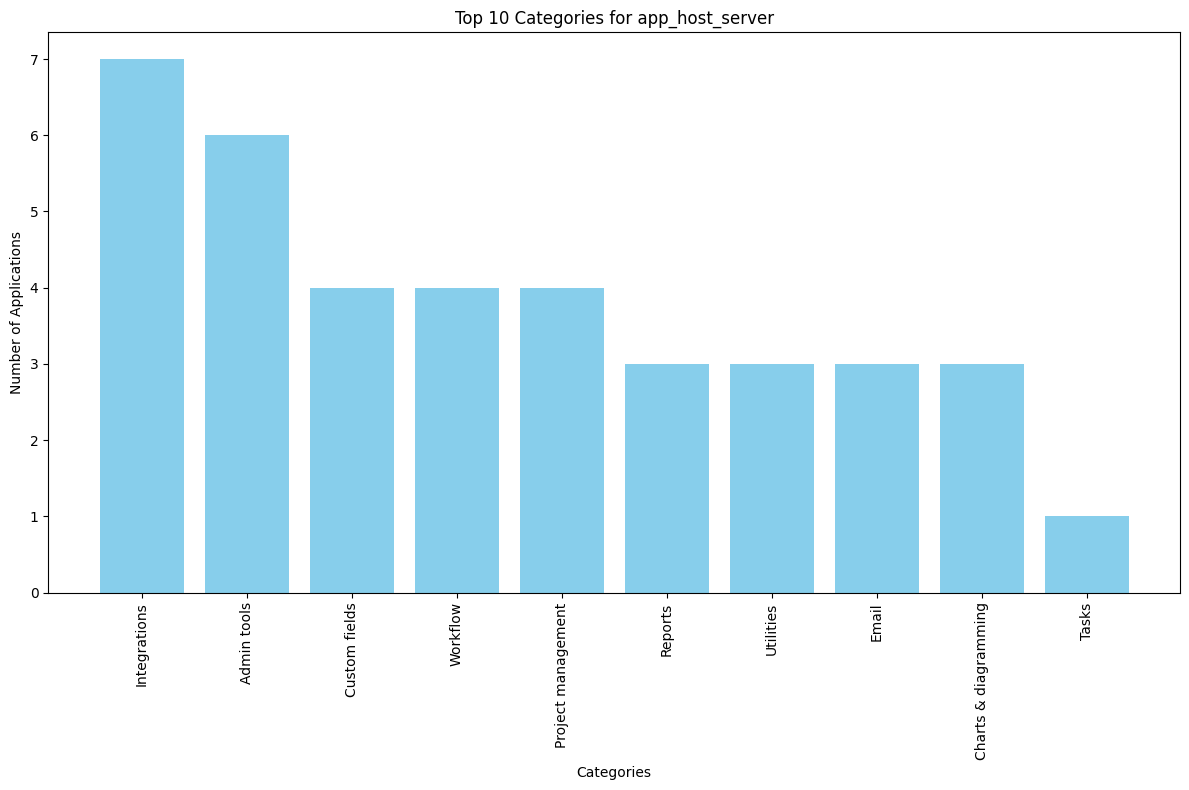

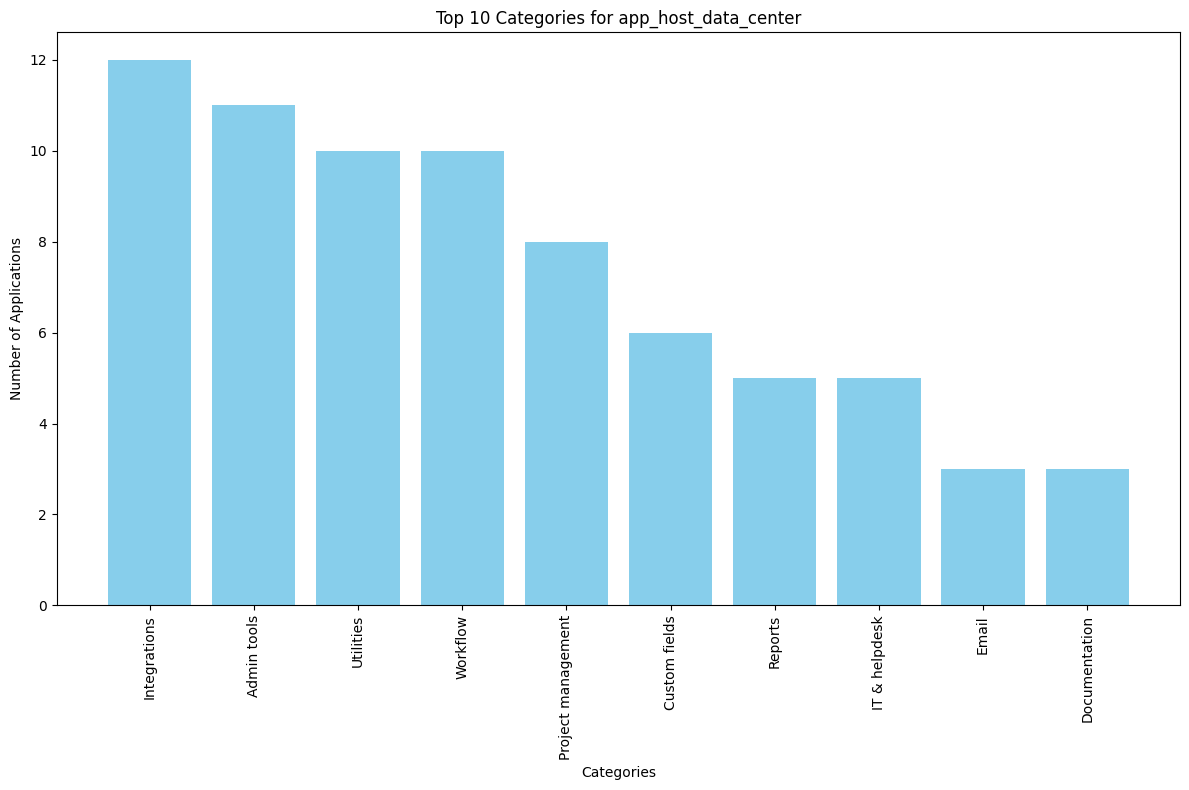

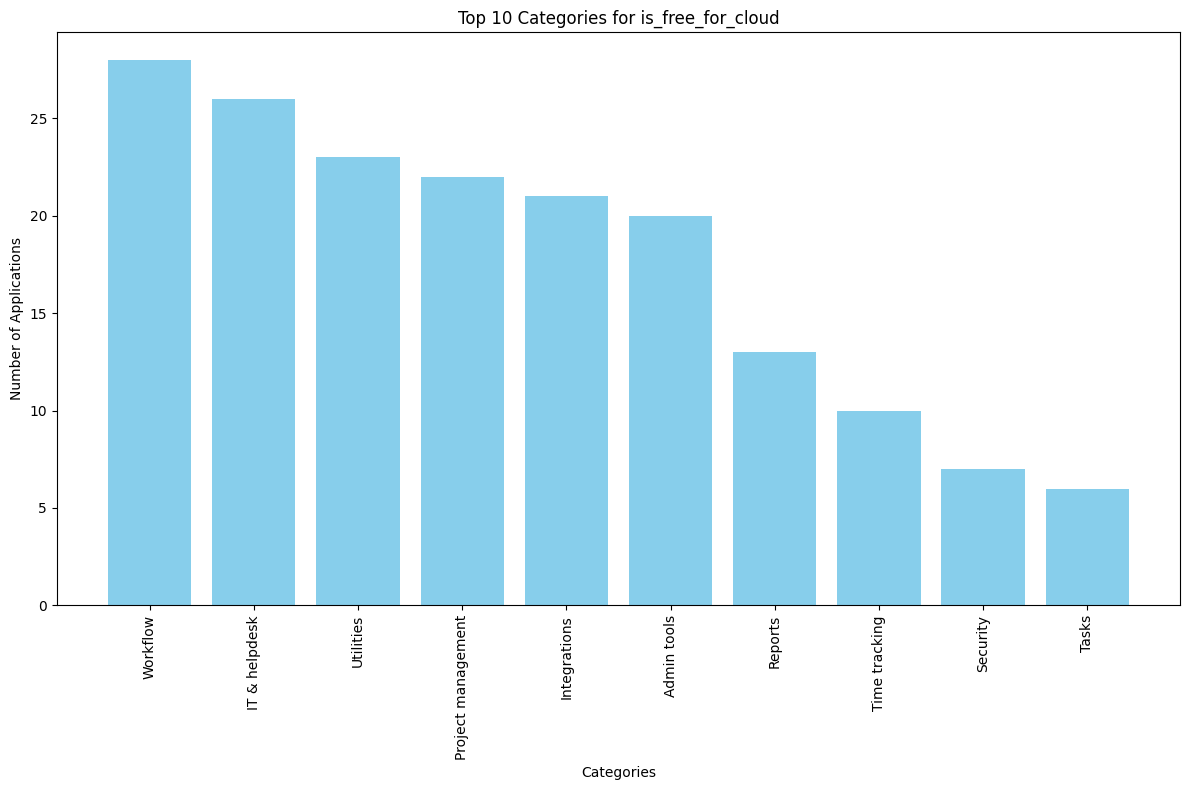

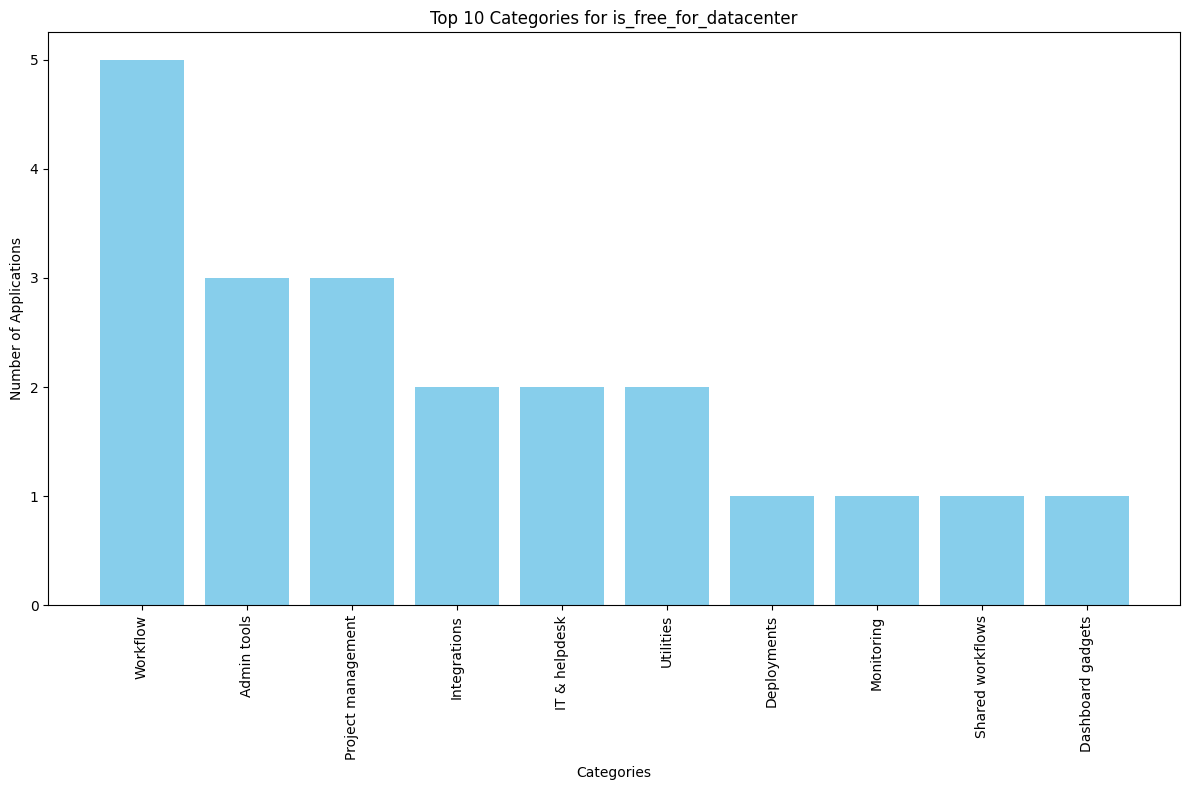

In [6]:
def plot_top_10_categories(df, filter_column, title):
    category_counts = {}
    df_filtered = df[df[filter_column] == 1]

    for category in category_columns:
        category_counts[category] = df_filtered[category].sum()

    sorted_category_counts = dict(sorted(category_counts.items(), key=lambda item: item[1], reverse=True))

    top_10_categories = dict(list(sorted_category_counts.items())[:10])

    plt.figure(figsize=(12, 8))
    plt.bar(top_10_categories.keys(), top_10_categories.values(), color='skyblue')
    plt.title(f'Top 10 Categories for {title}')
    plt.xlabel('Categories')
    plt.ylabel('Number of Applications')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

for column in host_columns:
    plot_top_10_categories(df_last_year, column, column)